In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [9]:
import matplotlib_inline

In [10]:
df.rename(columns={'Gender' : 'gender', 'Age' : 'age', 'Annual Income (k$)' : 'annual_income', 'Spending Score (1-100)' : 'score'}, inplace=True)

In [11]:
df.head()

,CustomerID,gender,age,annual_income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.shape

(200, 5)

In [13]:
df.isnull().sum()

CustomerID       0
gender           0
age              0
annual_income    0
score            0
dtype: int64

In [14]:
df.describe()

,CustomerID,age,annual_income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
import seaborn as sb

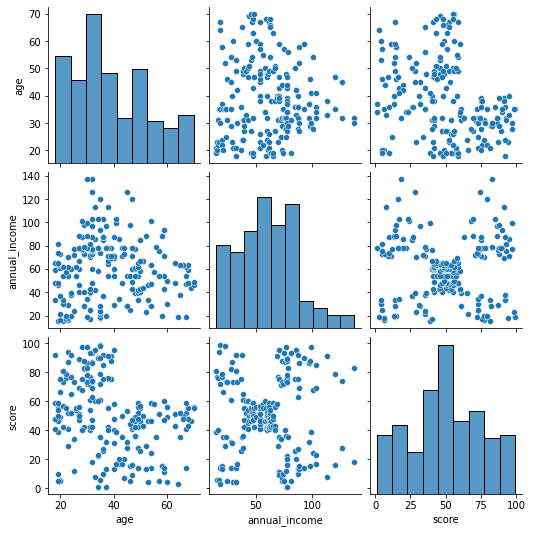

In [16]:
sb.pairplot(df[['age', 'annual_income', 'score']])

In [18]:
from sklearn import cluster as cluster

In [19]:
km = cluster.KMeans(n_clusters=5)

In [20]:
km = km.fit(df[['score', 'annual_income']])

In [22]:
df['score_cluster'] = km.labels_

In [23]:
df.head()

,CustomerID,gender,age,annual_income,score,score_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [24]:
df_0 = df[df['score_cluster'] == 0]
df_1 = df[df['score_cluster'] == 1]
df_2 = df[df['score_cluster'] == 2]
df_3 = df[df['score_cluster'] == 3]
df_4 = df[df['score_cluster'] == 4]

In [25]:
import matplotlib.pyplot as plt

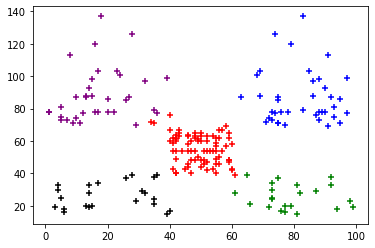

In [26]:
plt.scatter(df_0.score, df_0.annual_income, marker='+', c='red')
plt.scatter(df_1.score, df_1.annual_income, marker='+', c='green')
plt.scatter(df_2.score, df_2.annual_income, marker='+', c='blue')
plt.scatter(df_3.score, df_3.annual_income, marker='+', c='purple')
plt.scatter(df_4.score, df_4.annual_income, marker='+', c='black')

<AxesSubplot:xlabel='annual_income', ylabel='score'>

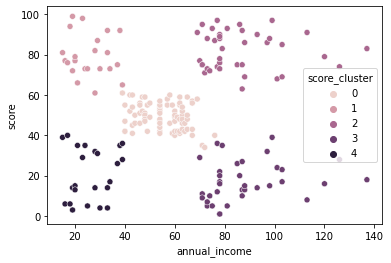

In [28]:
sb.scatterplot(x='annual_income', y='score', hue='score_cluster', data=df)

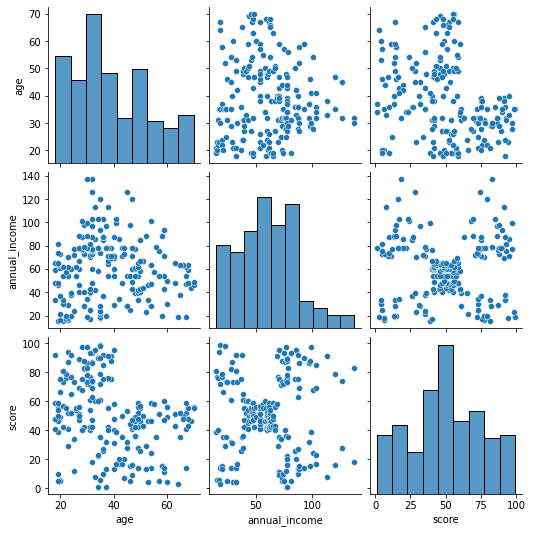

In [29]:
sb.pairplot(df[['age', 'annual_income', 'score']])

In [30]:
km = cluster.KMeans(n_clusters=2)

In [31]:
km = km.fit(df[['score', 'age']])

In [32]:
df['age_cluster'] = km.labels_
df.head()

,CustomerID,gender,age,annual_income,score,score_cluster,age_cluster
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,4,0


<AxesSubplot:xlabel='score', ylabel='age'>

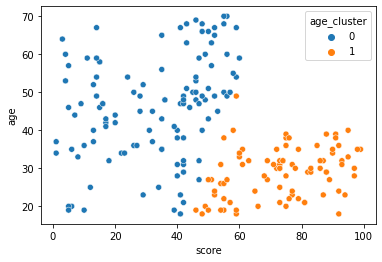

In [34]:
sb.scatterplot(x='score', y='age', hue='age_cluster', data=df)

In [38]:
k_range = range(1,10)
sse = []

In [43]:
for k in k_range:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df[['age', 'score']])
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
sse

[136092.0,
 0.0,
 171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23810.462233071372,
 19606.56668156404,
 15523.684014328754,
 13054.172145982677,
 11453.718049229356]